In [26]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
import skimage

In [27]:
def load_image_files(container_path, dimension=(104, 104)):
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "Rice leaves disease detection using SVM"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [29]:
image_dataset = load_image_files(r'C:\Users\prajw\Desktop\iotagriculture\Disease_Detection_In_Rice_Leaves-main\Disease_Detection_In_Rice_Leaves-main\rice_leaf_diseases_dataset') #Load here dataset
print(image_dataset.target_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [30]:
print(image_dataset.target_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(clf.score(X_test,y_test))

0.8648648648648649


In [34]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.96      0.88      0.92       124
           2       0.42      0.85      0.56        13

    accuracy                           0.86       148
   macro avg       0.76      0.82      0.76       148
weighted avg       0.91      0.86      0.88       148




In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  8   2   1]
 [  1 109  14]
 [  0   2  11]]


In [38]:
print(y_pred)

[1 1 1 1 2 0 1 0 1 1 1 1 1 1 2 1 1 1 1 1 2 0 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 0 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 2 1 0 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 1 1 1 2 0 1 1 2 0 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


In [39]:
from PIL import Image
import os
def load_image(file):
    dimension=(104, 104)
    image = Image.open(file)
    flat_data = []
    img = skimage.io.imread(file)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    flat_data.append(img_resized.flatten()) 
    return image,flat_data

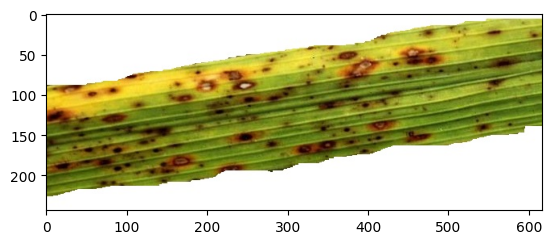

Predicted Disease is Brown spot


In [40]:
plot , img = load_image(r'C:\Users\prajw\Desktop\iotagriculture\Disease_Detection_In_Rice_Leaves-main\Disease_Detection_In_Rice_Leaves-main\rice_leaf_diseases_dataset\Brown spot\DSC_0101.jpg')
%matplotlib inline
plt.imshow(plot)
plt.show()
k = image_dataset.target_names
p = clf.predict(img)

s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted Disease is", k[a])

In [41]:
import pickle
# now you can save it to a file
with open(r'C:\Users\prajw\Desktop\iotagriculture\Disease_Detection_In_Rice_Leaves-main\Disease_Detection_In_Rice_Leaves-main\model\Rice_Leaves_Disease_Detection.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [42]:

with open(r'C:\Users\prajw\Desktop\iotagriculture\Disease_Detection_In_Rice_Leaves-main\Disease_Detection_In_Rice_Leaves-main\model\Rice_Leaves_Disease_Detection.pkl', 'rb') as f:
    clf1 = pickle.load(f)

In [43]:
cy = clf1.predict(img)
print(cy)

[1]


In [44]:
import sklearn
print(sklearn.__version__)

1.3.0


# End